In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from Deep_Learning.Experimental.Boltzmann.train import train, eval
from Deep_Learning.Experimental.Boltzmann.model import FCBoltzmannModel
from Utils.dataset import PreloadedDataset

In [2]:
# device = torch.device('cuda') if torch.cuda.is_available() else "cpu"ArithmeticError
device = torch.device('cpu')
device

device(type='cpu')

In [3]:
# Sets vals < 0.0 -> 0.0 and vals >= 0.0 -> 1.0
class HopfieldActivation():
    def __call__(self, x, _=None):
        return hopfield_activation(x)

def hopfield_activation(x: torch.Tensor, threshold:float=0.0):
    x = torch.clamp(x, max=0.0)
    x = torch.sign(x)
    x += 1.0
    return x

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    HopfieldActivation(),
])

subset_size = 64
dataset = datasets.MNIST(root="../Datasets/", train=True, transform=transform, download=False)
dataset = torch.utils.data.Subset(dataset, range(subset_size))

dataset = PreloadedDataset.from_dataset(dataset, transforms.ToTensor(), device)
print(f'Loaded MNIST with {len(dataset)} samples')

Loaded MNIST with 64 samples


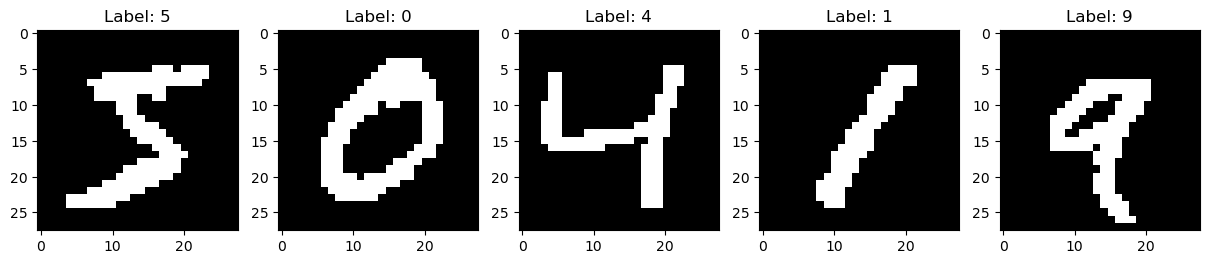

In [5]:
# show first samples
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axs[i].imshow(np.squeeze(dataset[i][0].numpy()), cmap='gray')
    axs[i].set_title(f"Label: {dataset[i][1]}")
plt.show()

In [6]:
batch_size = 32
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [7]:
eval_criterion=nn.MSELoss()
model = FCBoltzmannModel(784, 32, [256])
step = 0

In [8]:
learning_rate = 0.1
epochs = 20
train(
    model, 
    dataloader, 
    eval_criterion, 
    learning_rate, 
    epochs, 
    neg_every=1,
    neg_num=10000,
    model_params=[100, (1.0, 5.0), False],
    eval_every=1,
    step=step
)

RuntimeError: size mismatch, got 1, 1x256,32